In [2]:
import pandas as pd

df = pd.read_csv("student_data.csv")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.shape

(395, 33)

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
df = df.drop(columns=['student_id', 'name'], errors='ignore')


In [6]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

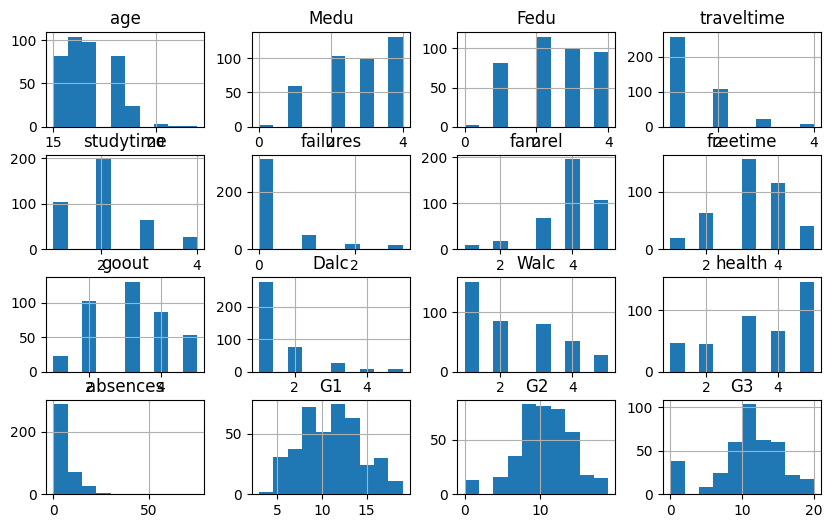

In [7]:
import matplotlib.pyplot as plt

df.hist(figsize=(10,6))
plt.show()


In [9]:
numeric_df = df.select_dtypes(include='number')


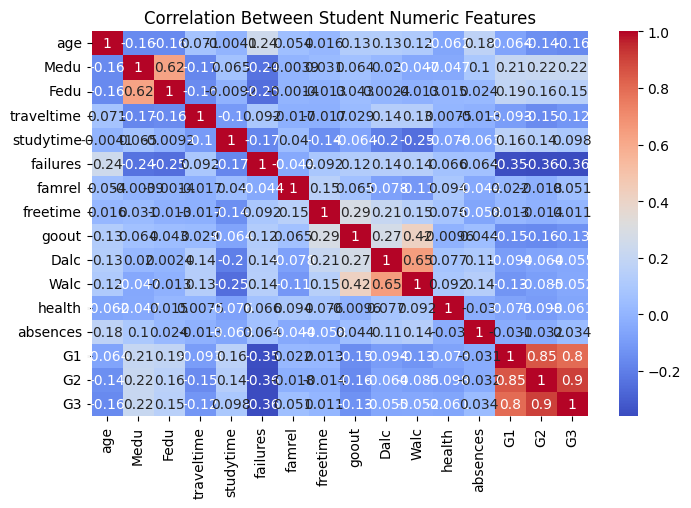

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Student Numeric Features")
plt.show()


In [12]:
df_numeric = df.select_dtypes(include='number')



In [13]:
df_numeric.dtypes


age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)


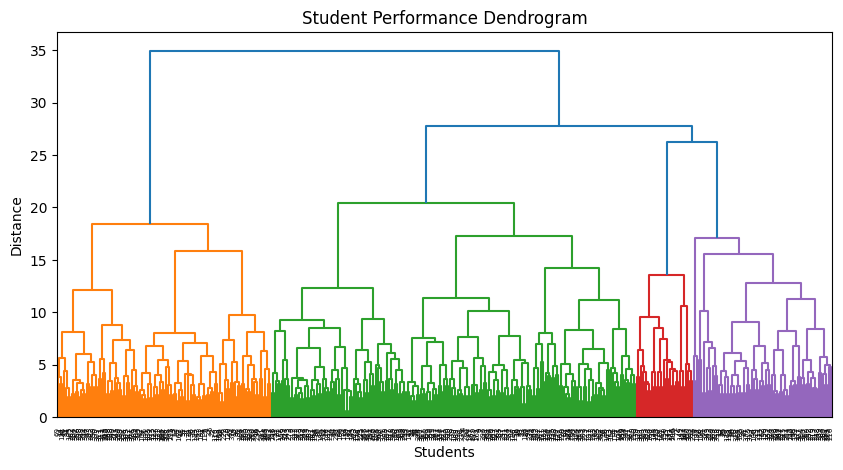

In [15]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,5))
sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Student Performance Dendrogram")
plt.xlabel("Students")
plt.ylabel("Distance")
plt.show()


In [16]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(
    n_clusters=4,
    metric='euclidean',
    linkage='ward'
)

clusters = hc.fit_predict(X_scaled)
df['Cluster'] = clusters


In [18]:
df.groupby('Cluster').mean(numeric_only=True)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Cluster,,,,,,,,,,,,,,,,
0,16.543011,2.419355,2.387097,1.543011,2.053763,0.134409,4.010753,3.043011,2.903226,1.236559,1.951613,3.505376,4.247312,9.736559,9.344086,8.892473
1,16.660550,3.229358,2.779817,1.229358,2.321101,0.146789,4.009174,3.247706,2.862385,1.128440,1.761468,3.330275,5.238532,14.541284,14.504587,14.761468
2,16.901408,3.211268,2.845070,1.436620,1.774648,0.281690,3.816901,3.619718,3.915493,2.563380,3.760563,3.915493,10.915493,10.000000,10.126761,9.929577
3,17.310345,1.931034,1.620690,1.689655,1.482759,2.448276,3.586207,3.482759,3.379310,1.724138,2.862069,3.827586,4.103448,7.000000,6.689655,5.034483


In [19]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, df['Cluster'])
print(score)


0.08299300531214557


In [20]:
%%writefile requirements.txt
streamlit
scikit-learn
numpy
joblib

Writing requirements.txt
